In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

PROJECT_ROOT = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
DATA_PATH = PROJECT_ROOT / "data" / "raw" / "venue_weekly_data.csv"

plt.style.use("default")


Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv(DATA_PATH, parse_dates=["date"])
df.head()


,date,venue_id,revenue,staff_hours,weather_score,local_event,promotion,opening_hours,week_of_year
0,2023-01-01,V1,21361.14,41.6,1.0,0,0,80,52
1,2023-01-08,V1,21838.37,44.5,0.0,0,1,83,1
2,2023-01-15,V1,24928.63,45.2,1.0,0,1,87,2
3,2023-01-22,V1,19483.45,38.4,0.5,0,0,86,3
4,2023-01-29,V1,21886.53,36.6,1.0,0,0,89,4


In [4]:
df.info()
df.describe(numeric_only=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           525 non-null    datetime64[ns]
 1   venue_id       525 non-null    object        
 2   revenue        525 non-null    float64       
 3   staff_hours    525 non-null    float64       
 4   weather_score  525 non-null    float64       
 5   local_event    525 non-null    int64         
 6   promotion      525 non-null    int64         
 7   opening_hours  525 non-null    int64         
 8   week_of_year   525 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 37.0+ KB


TypeError: NDFrame.describe() got an unexpected keyword argument 'numeric_only'

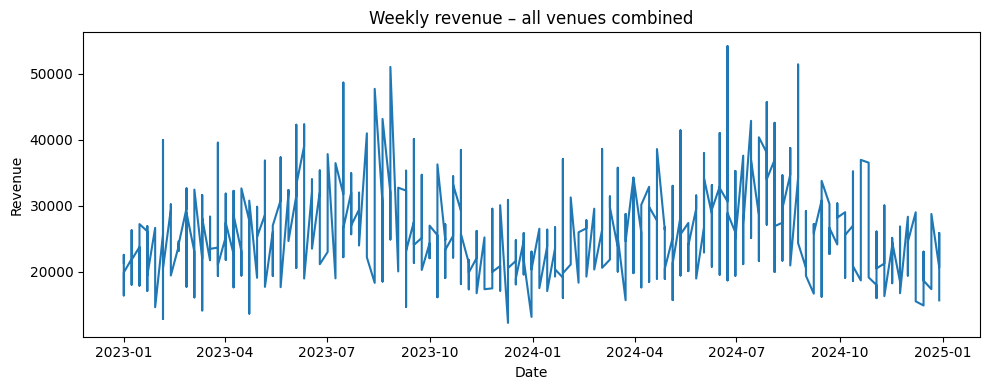

In [5]:
df_sorted = df.sort_values("date")

plt.figure(figsize=(10, 4))
plt.plot(df_sorted["date"], df_sorted["revenue"])
plt.title("Weekly revenue – all venues combined")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


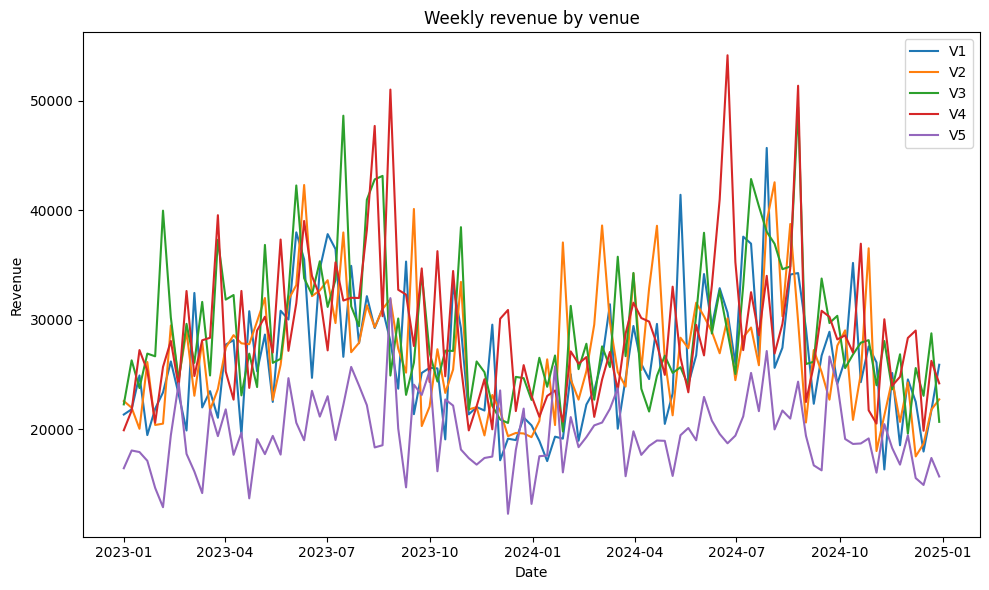

In [6]:
plt.figure(figsize=(10, 6))

for venue_id, group in df_sorted.groupby("venue_id"):
    plt.plot(group["date"], group["revenue"], label=venue_id)

plt.title("Weekly revenue by venue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.show()


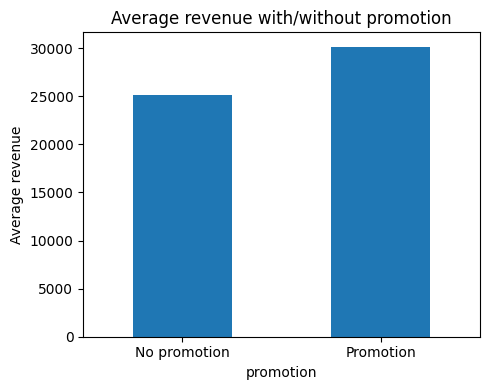

In [7]:
df.groupby("promotion")["revenue"].mean()
df.groupby("local_event")["revenue"].mean()
promo_means = df.groupby("promotion")["revenue"].mean()

plt.figure(figsize=(5, 4))
promo_means.plot(kind="bar")
plt.xticks([0, 1], ["No promotion", "Promotion"], rotation=0)
plt.ylabel("Average revenue")
plt.title("Average revenue with/without promotion")
plt.tight_layout()
plt.show()


In [8]:
PROCESSED_PATH = PROJECT_ROOT / "data" / "processed" / "test_predictions_with_staffing.csv"
preds = pd.read_csv(PROCESSED_PATH, parse_dates=["date"])
preds.head()


,date,venue_id,revenue,staff_hours,predicted_revenue,suggested_staff_hours_centre,suggested_staff_hours_min,suggested_staff_hours_max
0,2024-08-11,V4,29624.09,59.0,28070.520338,56.1,50.5,61.8
1,2024-08-11,V2,30329.02,59.9,30480.418115,61.0,54.9,67.1
2,2024-08-11,V3,34623.56,70.2,33096.584074,66.2,59.6,72.8
3,2024-08-11,V5,21725.38,54.0,25320.844972,50.6,45.6,55.7
4,2024-08-18,V3,34866.07,58.4,30341.766374,60.7,54.6,66.8


In [9]:
venue_example = preds["venue_id"].unique()[0]
venue_example


'V4'

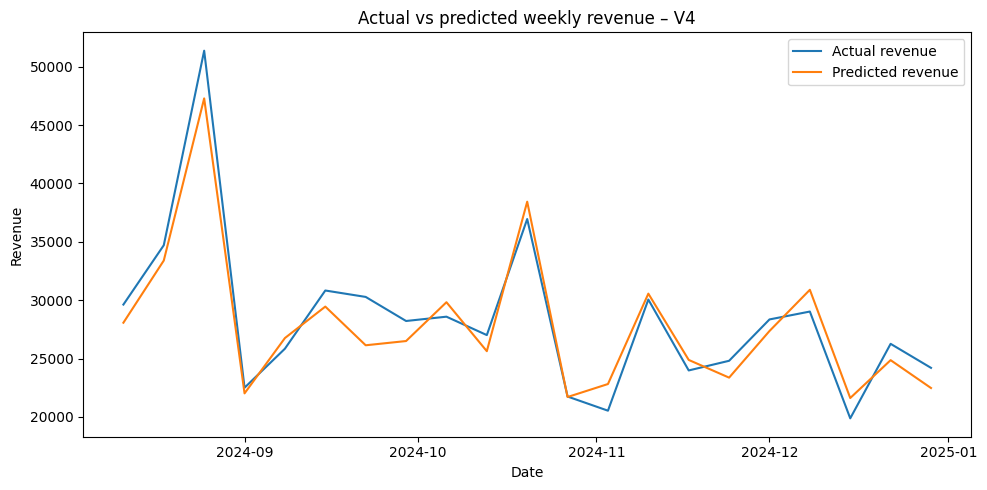

In [10]:
venue_df = preds[preds["venue_id"] == venue_example].sort_values("date")

plt.figure(figsize=(10, 5))
plt.plot(venue_df["date"], venue_df["revenue"], label="Actual revenue")
plt.plot(venue_df["date"], venue_df["predicted_revenue"], label="Predicted revenue")
plt.title(f"Actual vs predicted weekly revenue – {venue_example}")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.show()


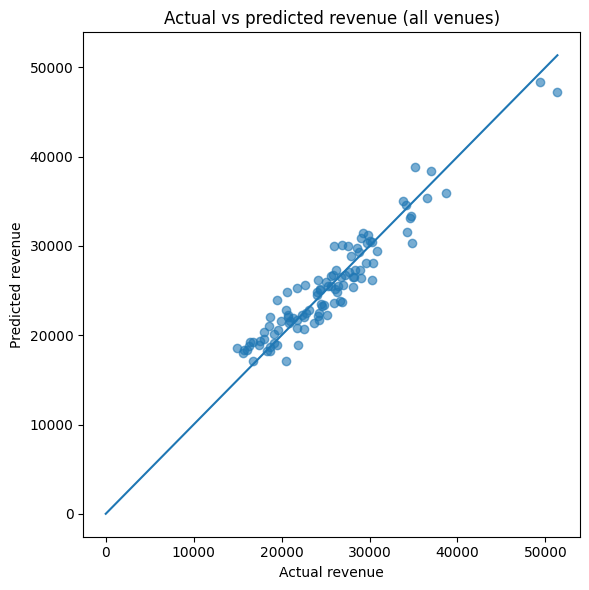

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(preds["revenue"], preds["predicted_revenue"], alpha=0.6)
max_val = max(preds["revenue"].max(), preds["predicted_revenue"].max())
plt.plot([0, max_val], [0, max_val])
plt.xlabel("Actual revenue")
plt.ylabel("Predicted revenue")
plt.title("Actual vs predicted revenue (all venues)")
plt.tight_layout()
plt.show()


In [12]:
cols_to_show = [
    "date",
    "venue_id",
    "revenue",
    "predicted_revenue",
    "staff_hours",
    "suggested_staff_hours_min",
    "suggested_staff_hours_centre",
    "suggested_staff_hours_max",
]

venue_staff = preds[preds["venue_id"] == venue_example].sort_values("date", ascending=False)
venue_staff[cols_to_show].head(10)


,date,venue_id,revenue,predicted_revenue,staff_hours,suggested_staff_hours_min,suggested_staff_hours_centre,suggested_staff_hours_max
99,2024-12-29,V4,24203.98,22477.275796,42.8,40.5,45.0,49.5
95,2024-12-22,V4,26261.04,24863.329895,54.8,44.8,49.7,54.7
89,2024-12-15,V4,19880.01,21620.517467,40.7,38.9,43.2,47.6
87,2024-12-08,V4,29025.94,30889.061829,60.6,55.6,61.8,68.0
81,2024-12-01,V4,28350.53,27359.265185,59.0,49.2,54.7,60.2
75,2024-11-24,V4,24809.02,23366.511384,50.6,42.1,46.7,51.4
71,2024-11-17,V4,23982.05,24882.348047,52.8,44.8,49.8,54.7
64,2024-11-10,V4,30053.90,30560.355471,63.3,55.0,61.1,67.2
62,2024-11-03,V4,20535.59,22818.860158,44.4,41.1,45.6,50.2
54,2024-10-27,V4,21746.69,21706.569346,39.3,39.1,43.4,47.8


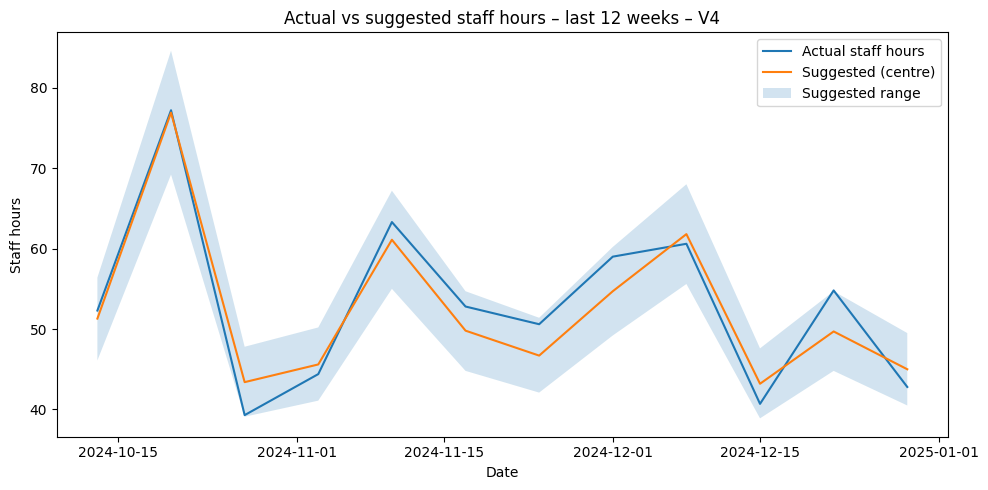

In [13]:
recent = venue_staff.sort_values("date").tail(12)

plt.figure(figsize=(10, 5))
plt.plot(recent["date"], recent["staff_hours"], label="Actual staff hours")
plt.plot(recent["date"], recent["suggested_staff_hours_centre"], label="Suggested (centre)")
plt.fill_between(
    recent["date"],
    recent["suggested_staff_hours_min"],
    recent["suggested_staff_hours_max"],
    alpha=0.2,
    label="Suggested range",
)
plt.title(f"Actual vs suggested staff hours – last 12 weeks – {venue_example}")
plt.xlabel("Date")
plt.ylabel("Staff hours")
plt.legend()
plt.tight_layout()
plt.show()
